In [1]:
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from shapely.geometry import Polygon, Point, MultiPolygon
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas as gpd
# import contextily as cx
from tqdm import tqdm
import json
import os
import utilities
import pickle


In [3]:
lat_long=pd.read_csv("lat_long.csv")

In [7]:
for i in  range(1): #range(len(lat_long)):
    print(lat_long.iloc[i,0])
    print(lat_long.iloc[i,1])
    new_data=data_building_lots=utilities.building_extract(x=lat_long.iloc[i,1],y=lat_long.iloc[i,0], r=0.03)
    if os.path.isfile("Pycitylayers_dataset.csv"):
        old_data=pd.read_csv("Pycitylayers_dataset.csv")
        mask=new_data["index"].isin(old_data["index"])
        new_data=new_data[~mask]
        print("new data length:",len(new_data))
        new_data=pd.concat([new_data,old_data])
    new_data.to_csv("Pycitylayers_dataset.csv")
    print(f"now dataset has {len(new_data)} buildings")


45.524972
-73.637156
Fetching Metadata. Please Wait ...
building lots collection acquired
selecting 25161 buildings in 3333 m radius of point -73.637156,45.524972
now dataset has 25161 buildings


In [29]:
geom_df=[]
for i in tqdm(range(len(new_data))):
    geom_df.append(new_data["geom"].to_dict())

  1%|          | 608/99427 [01:06<4:02:33,  6.79it/s] 

In [ ]:
geom_df

In [27]:
geom_df=pd.DataFrame(new_data["geom"])
geom_df.iloc[0,].to_dict()

{'geom': {'type': 'Polygon',
  'crs': {'type': 'name',
   'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}},
  'coordinates': [[[-73.6330686503482, 45.4634671312728],
    [-73.6331874190179, 45.4635129795924],
    [-73.6333331676993, 45.4633257128201],
    [-73.6332159820744, 45.4632801327853],
    [-73.6330686503482, 45.4634671312728]]]}}

Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 11 tracts in 556 m radius of point -73.577702,45.529526


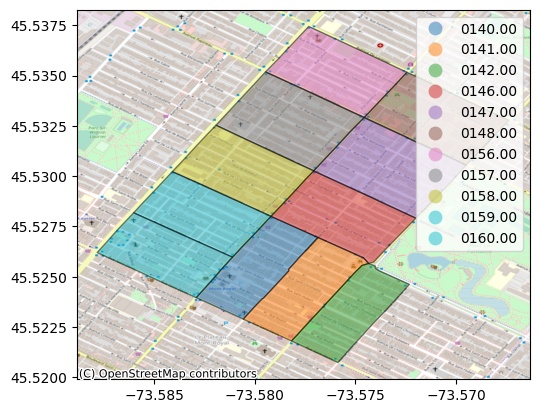

In [3]:
utilities.plot_it(utilities.tract_extract(x=-73.577702,y=45.529526, r=0.0050),multipolygon=True,column="CTNAME",legend=True,alpha=0.5)

In [4]:
Plateau_tract_list=[]
Plateau_tract_list=utilities.tract_extract(x=-73.577702,y=45.529526, r=0.0050)["CTNAME"]
Plateau_tract_list

Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 11 tracts in 556 m radius of point -73.577702,45.529526


0     0148.00
1     0140.00
2     0141.00
3     0142.00
4     0146.00
5     0147.00
6     0156.00
7     0157.00
8     0158.00
9     0159.00
10    0160.00
Name: CTNAME, dtype: object

In [5]:
X,Y,R=-73.577702,45.529526,0.013
new_data=data_building_lots=utilities.building_extract(x=X,y=Y, r=R)
new_data=utilities.tract_assign(new_data,X,Y,R)
new_data=new_data[new_data["Tract"].isin(Plateau_tract_list)]
new_data=new_data[new_data["landuse_code"]==1000]
new_data.to_csv("Pycitylayers_dataset_plateau.csv")
print(f"now dataset has {len(new_data)} buildings")

Fetching Metadata. Please Wait ...
building lots collection acquired
selecting 9293 buildings in 1444 m radius of point -73.577702,45.529526
Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 42 tracts in 1444 m radius of point -73.577702,45.529526
now dataset has 3446 buildings


c:\Users\msham\OneDrive\Documents\GitHub\PyCityLayers-OB-extension\utilities.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Tract"][j]=tracts_assigned_dict[j]


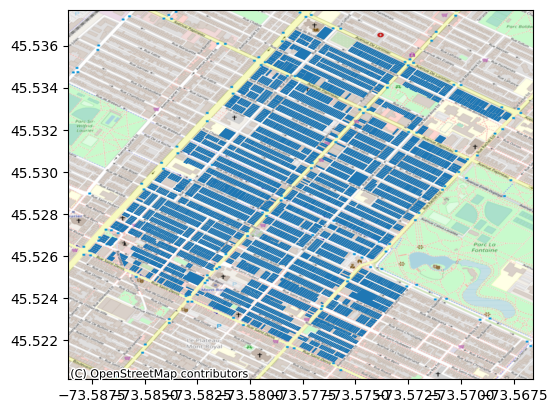

In [6]:
utilities.plot_it(new_data)

In [8]:
with open('plateau.pickle', 'wb') as handle:
    pickle.dump(new_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open('plateau.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [12]:
b.iloc[0,:]["geom"]["coordinates"]

[[[-73.5730138414725, 45.5350500319522],
  [-73.5731042984104, 45.5350923605603],
  [-73.5731320688019, 45.5350884731083],
  [-73.5731753098058, 45.5350429092198],
  [-73.5728502570417, 45.5348905797128],
  [-73.5727958362499, 45.5349477596352],
  [-73.5730138414725, 45.5350500319522]]]

In [131]:
pd.read_csv("Pycitylayers_dataset_plateau.csv").shape

(3446, 22)

In [99]:
new_data.shape

(7181, 21)

Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 2 tracts in 222 m radius of point -73.606981,45.518281


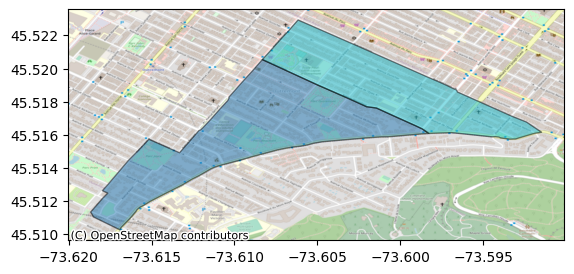

In [43]:
utilities.plot_it(utilities.tract_extract(x=-73.606981,y=45.518281, r=0.002),multipolygon=True,column="CTNAME",legend=False,alpha=0.5)

In [5]:
Outremont_tract_list=[]
Outremont_tract_list=utilities.tract_extract(x=-73.606981,y=45.518281, r=0.002)["CTNAME"]
Outremont_tract_list

Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 2 tracts in 222 m radius of point -73.606981,45.518281


0    0362.00
1    0363.00
Name: CTNAME, dtype: object

Fetching Metadata. Please Wait ...
building lots collection acquired
selecting 8559 buildings in 1889 m radius of point -73.606981,45.518281
Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 33 tracts in 1889 m radius of point -73.606981,45.518281


c:\Users\msham\OneDrive\Documents\GitHub\PyCityLayers-OB-extension\utilities.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Tract"][j]=tracts_assigned_dict[j]


now dataset has 1185 buildings


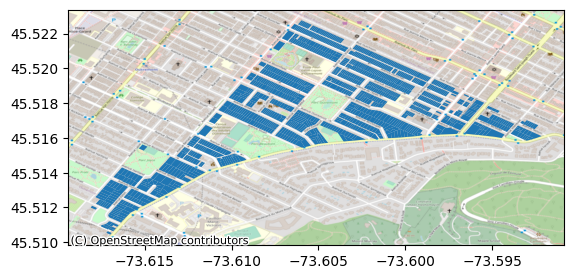

In [6]:
X,Y,R=-73.606981,45.518281,0.017
new_data=data_building_lots=utilities.building_extract(x=X,y=Y, r=R)
new_data=utilities.tract_assign(new_data,X,Y,R)
new_data=new_data[new_data["Tract"].isin(Outremont_tract_list)]
new_data=new_data[new_data["landuse_code"]==1000]
new_data.to_csv("Pycitylayers_dataset_outremont.csv")
print(f"now dataset has {len(new_data)} buildings")
utilities.plot_it(new_data)

In [ ]:
with open('outremont.pickle', 'wb') as handle:
    pickle.dump(new_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [133]:
len(new_data)

1185

Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 10 tracts in 778 m radius of point -73.578497,45.497005


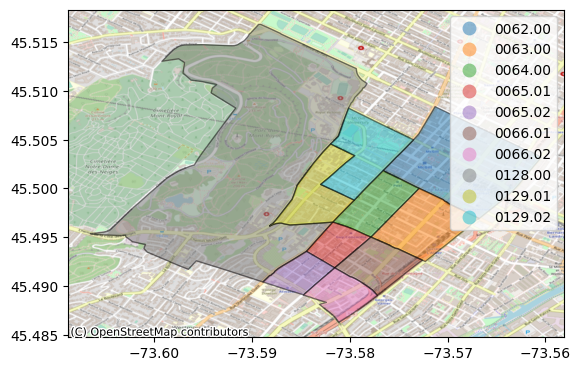

In [62]:
utilities.plot_it(utilities.tract_extract(x=-73.578497,y=45.497005, r=0.007),multipolygon=True,column="CTNAME",legend=True,alpha=0.5)

In [2]:
Downtown_tract_list=[]
Downtown_tract_list=utilities.tract_extract(x=-73.578497,y=45.497005, r=0.007)["CTNAME"]
Downtown_tract_list=Downtown_tract_list[Downtown_tract_list!="0128.00"]
Downtown_tract_list=Downtown_tract_list.reset_index(drop=True)
Downtown_tract_list

Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 10 tracts in 778 m radius of point -73.578497,45.497005


0    0062.00
1    0063.00
2    0064.00
3    0065.01
4    0065.02
5    0066.01
6    0066.02
7    0129.01
8    0129.02
Name: CTNAME, dtype: object

Fetching Metadata. Please Wait ...
building lots collection acquired
selecting 7098 buildings in 2222 m radius of point -73.578497,45.497005
Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 45 tracts in 2222 m radius of point -73.578497,45.497005


c:\Users\msham\OneDrive\Documents\GitHub\PyCityLayers-OB-extension\utilities.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Tract"][j]=tracts_assigned_dict[j]


now dataset has 847 buildings


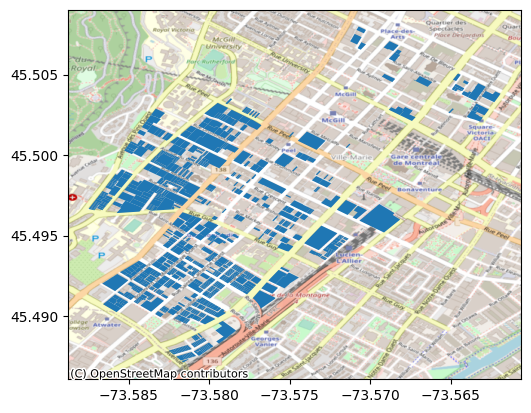

In [3]:
X,Y,R=-73.578497,45.497005,0.02
new_data=data_building_lots=utilities.building_extract(x=X,y=Y, r=R)
new_data=utilities.tract_assign(new_data,X,Y,R)
new_data=new_data[new_data["Tract"].isin(Downtown_tract_list)]
new_data=new_data[new_data["landuse_code"]==1000]
new_data.to_csv("Pycitylayers_dataset_downtown.csv")
print(f"now dataset has {len(new_data)} buildings")
utilities.plot_it(new_data)

In [4]:
with open('downtown.pickle', 'wb') as handle:
    pickle.dump(new_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [135]:
len(new_data)

847

In [65]:
Downtown_tract_list.drop(0128.02)

KeyError: '[128.02] not found in axis'

In [85]:
Downtown_tract_list=Downtown_tract_list.drop(0128.02).reset_index(drop=True)

In [86]:
Downtown_tract_list

0    0062.00
1    0063.00
2    0064.00
3    0065.01
4    0065.02
5    0066.01
6    0066.02
7    0129.01
8    0129.02
Name: CTNAME, dtype: object